In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('amazon.csv',encoding="ISO-8859-1")
pd.options.display.float_format = '{:,.2f}'.format
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.00,"Thursday, January 1, 1998"
1,1999,Acre,Janeiro,0.00,"Friday, January 1, 1999"
2,2000,Acre,Janeiro,0.00,"Saturday, January 1, 2000"
3,2001,Acre,Janeiro,0.00,"Monday, January 1, 2001"
4,2002,Acre,Janeiro,0.00,"Tuesday, January 1, 2002"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [4]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [5]:
data['month'].replace(to_replace=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],\
                      value=['January','February','March','April','May','June','July','August','September',\
                             'October','November','December'],inplace=True)

In [6]:
data['Day'] = data['date'].apply(lambda x:str(x).split(',')[0])
data.head()

,year,state,month,number,date,Day
0,1998,Acre,January,0.00,"Thursday, January 1, 1998",Thursday
1,1999,Acre,January,0.00,"Friday, January 1, 1999",Friday
2,2000,Acre,January,0.00,"Saturday, January 1, 2000",Saturday
3,2001,Acre,January,0.00,"Monday, January 1, 2001",Monday
4,2002,Acre,January,0.00,"Tuesday, January 1, 2002",Tuesday


In [7]:
data[data.duplicated()].shape

(32, 6)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
Day       0
dtype: int64

## Data Analysis

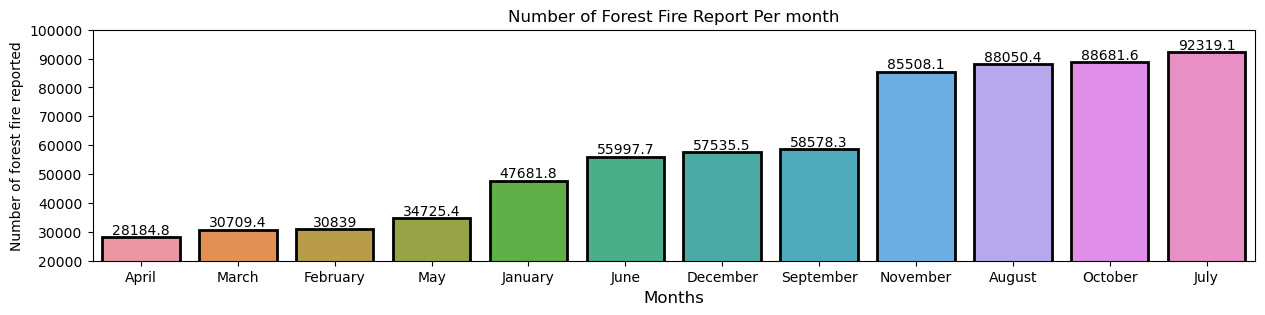

Maximum Number of Forest Fires Were Reported in the month of July


In [10]:
# In Which Month Maximum Number of Forest Fires Were Reported?
Forest_Fire_months = data.groupby('month')['number'].sum().reset_index()
Forest_Fire_months.sort_values(by='number',inplace=True)
fig,ax = plt.subplots(figsize=(15,3))
plot = sns.barplot(Forest_Fire_months['month'],Forest_Fire_months['number'],ax=ax,ec='k',lw=2)
ax.bar_label(plot.containers[0])
plt.ylabel('Number of forest fire reported')
plt.xlabel('Months',size=12)
plt.title('Number of Forest Fire Report Per month')
plt.ylim(20000,100000)
plt.show()
print('Maximum Number of Forest Fires Were Reported in the month of July')

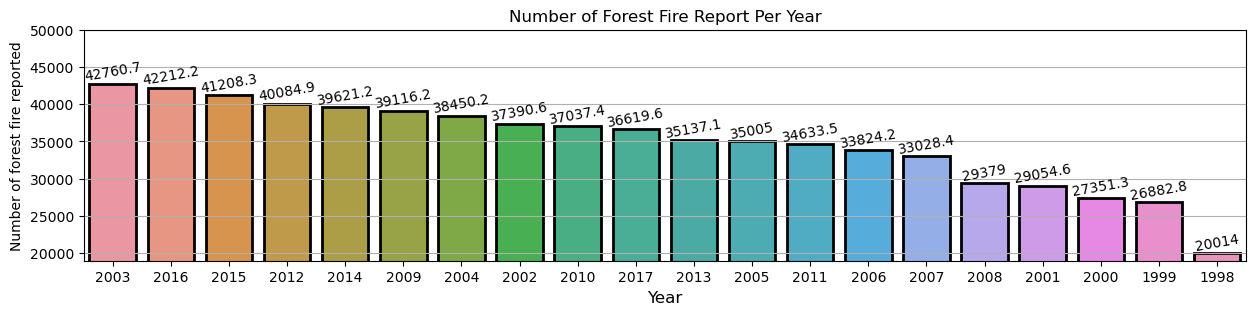

Maximum Number of Forest Fires Were Reported in the Year 2003


In [11]:
# In Which Year Maximum Number of Forest Fires Was Reported?
Forest_Fire_Year = data.groupby('year')['number'].sum().reset_index()
Forest_Fire_Year.sort_values(by='number',ascending=False,inplace=True)
Forest_Fire_Year['year'] = Forest_Fire_Year['year'].astype('str')
fig,ax = plt.subplots(figsize=(15,3))
plot = sns.barplot(Forest_Fire_Year['year'],Forest_Fire_Year['number'],ax=ax,ec='k',lw=2)
ax.bar_label(plot.containers[0],rotation=10)
plt.ylabel('Number of forest fire reported')
plt.xlabel('Year',size=12)
plt.title('Number of Forest Fire Report Per Year')
plt.ylim(19000,50000)
plt.grid(axis='y',)
plt.show()
print('Maximum Number of Forest Fires Were Reported in the Year 2003')

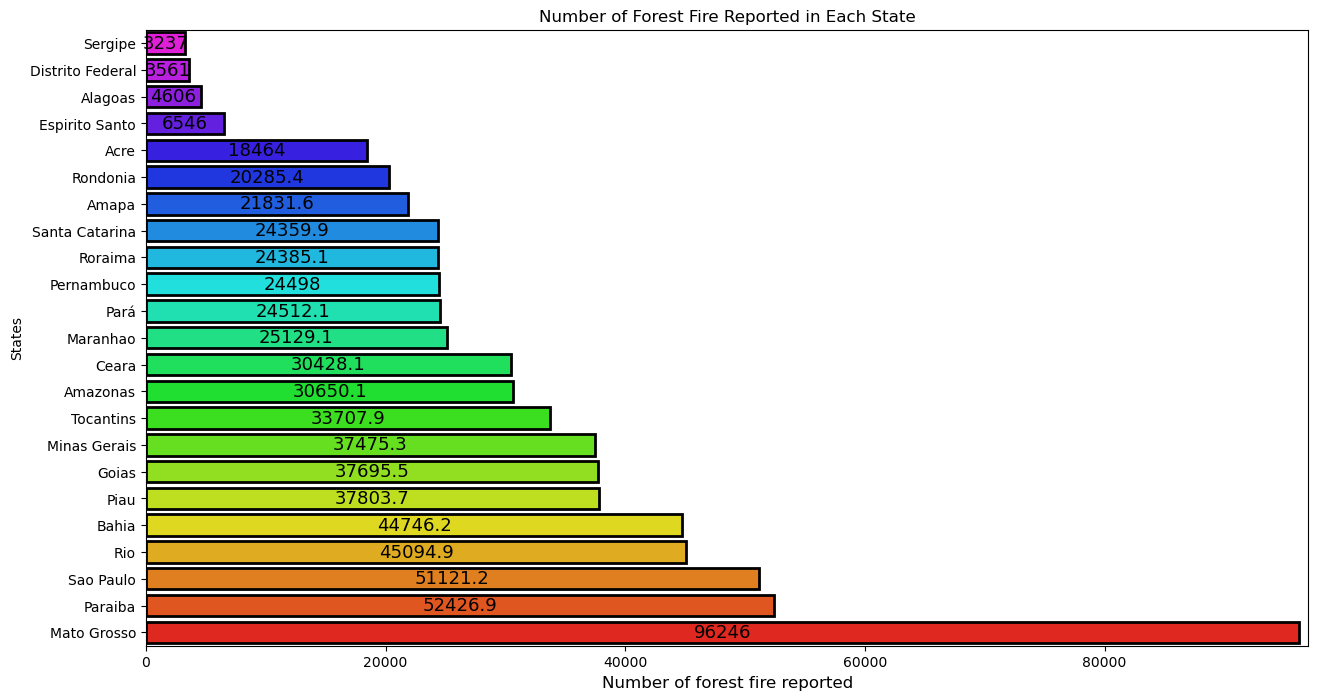

Maximum Number of Forest Fires Were Reported in Mato Grosso


In [12]:
# In Which State Maximum Number of Forest Fires Was Reported?
data.head()
data['state'].value_counts()
Forest_Fire_state = data.groupby('state')['number'].sum().reset_index()
Forest_Fire_state.sort_values(by='number',inplace=True)
fig,ax = plt.subplots(figsize=(15,8))
plot = sns.barplot(Forest_Fire_state['number'],Forest_Fire_state['state'],ax=ax,ec='k',lw=2,palette='gist_rainbow_r')
ax.bar_label(plot.containers[0],size=13,label_type='center')
plt.ylabel('States')
plt.xlabel('Number of forest fire reported',size=12)
plt.title('Number of Forest Fire Reported in Each State')
plt.xlim(0,97000)
plt.show()
print('Maximum Number of Forest Fires Were Reported in Mato Grosso')

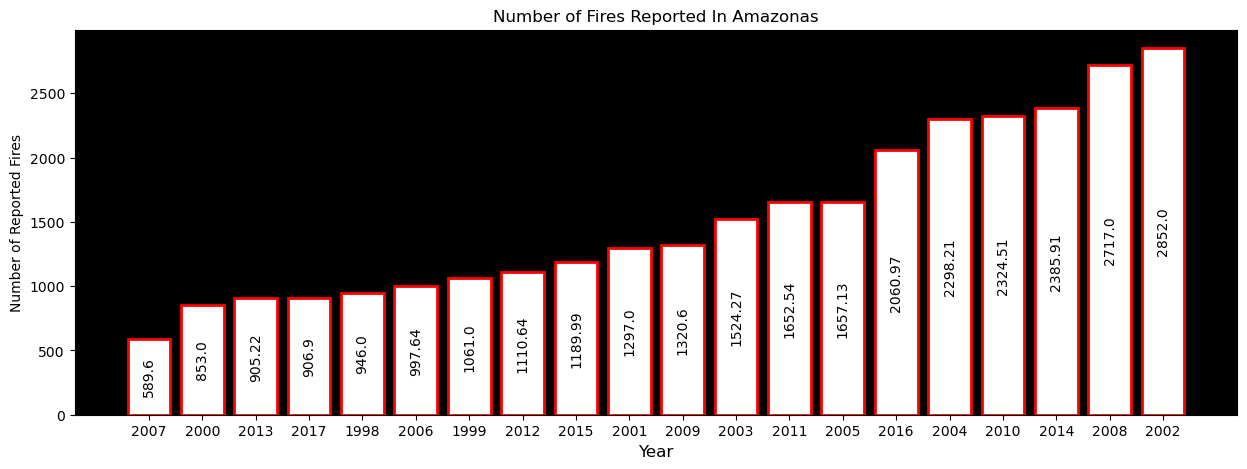

In [13]:
# Display Number of Fires Were Reported In Amazonas (Year-Wise)
Amazonas_Yearly_Forest_Report = data[data['state']=='Amazonas'].groupby('year')['number'].\
sum().reset_index().sort_values(by='number')
Amazonas_Yearly_Forest_Report['year'] = Amazonas_Yearly_Forest_Report['year'].astype('str')
plt.figure(figsize=(15,5))
ax = plt.axes()
ax.set_facecolor('k')
Amazonas = plt.bar(Amazonas_Yearly_Forest_Report['year'],Amazonas_Yearly_Forest_Report['number'],color='w',ec='r',lw=2)
plt.bar_label(Amazonas,labels=Amazonas_Yearly_Forest_Report['number'].round(2),color='k',label_type='center',rotation=90)
plt.xlabel('Year',size=12)
plt.ylabel('Number of Reported Fires')
plt.title('Number of Fires Reported In Amazonas')
plt.show()

In [14]:
# Find Total Number of Fires Were Reported In 2015
data[data['year']==2015]['number'].sum()

41208.292

In [15]:
# maximum number of fire reported 
data.sort_values(by='number',ascending=False)[:1]

,year,state,month,number,date,Day
888,2008,Amazonas,September,998.00,"Tuesday, January 1, 2008",Tuesday


In [16]:
# Maximum number of fire report in each state
states = []
for i in data['state'].unique():
    states.append(i)
for j in states:
    print(data[data['state']==j].sort_values(by='number',ascending=False)[:1][['state','number','year']].to_string(index=False))
    print('_'*30)

state  number  year
 Acre  960.00  2007
______________________________
  state  number  year
Alagoas  162.00  2015
______________________________
state  number  year
Amapa  969.00  2012
______________________________
   state  number  year
Amazonas  998.00  2008
______________________________
state  number  year
Bahia  995.00  2006
______________________________
state  number  year
Ceara  995.00  2012
______________________________
           state  number  year
Distrito Federal  196.00  2010
______________________________
         state  number  year
Espirito Santo  307.00  2015
______________________________
state  number  year
Goias  943.00  2015
______________________________
   state  number  year
Maranhao  972.00  2009
______________________________
      state  number  year
Mato Grosso  979.00  2009
______________________________
       state  number  year
Minas Gerais  959.00  2006
______________________________
state  number  year
 Pará  982.00  1999
__________________________

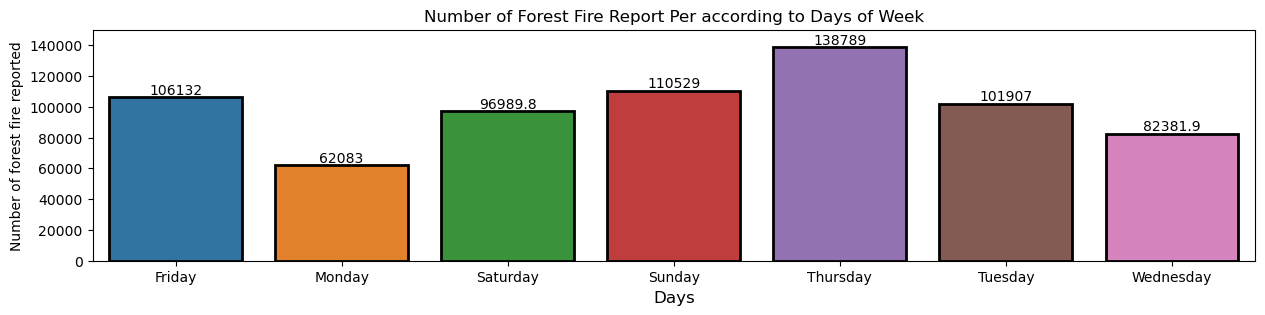

Maximum Number of Forest Fires Were Reported on Thursday


In [17]:
# Display Number of Fires Were Reported In Amazonas (Day-Wise)
data.head()
Fire_days = data.groupby('Day')['number'].sum().reset_index()
fig,ax = plt.subplots(figsize=(15,3))
plot = sns.barplot(Fire_days['Day'],Fire_days['number'],ax=ax,ec='k',lw=2)
ax.bar_label(plot.containers[0])
plt.ylabel('Number of forest fire reported')
plt.xlabel('Days',size=12)
plt.title('Number of Forest Fire Report Per according to Days of Week')
plt.ylim(0,150000)
# plt.grid(axis='y')
plt.show()
print('Maximum Number of Forest Fires Were Reported on Thursday')

In [18]:
# To Find The State Names Where Fires Were Reported In December Month
data.tail()
data[data['month']=='December']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)